In [1]:
from matplotlib import pyplot as plt
from keras.models import load_model
import os
from keras.preprocessing import image
import numpy as np
from torchvision import transforms

Using TensorFlow backend.
W1003 21:04:37.915088 140242979026560 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [2]:
input_size = 100
folder = '/home/iref/Datasets/Kern_project/large'
dst = '/home/iref/Datasets/Kern_project/for_resized'

In [3]:
#Получение набора образцов 100х100 из исходных фотографий высокого разрешения(по одному crop'у с каждой) 
'''data_transforms = transforms.RandomResizedCrop(input_size)
for imgname in os.listdir(folder):
    img = Image.open(os.path.join(folder, imgname))
    tr_img = data_transforms(img)
    plt.tight_layout()
    plt.imshow(tr_img)
    plt.show()
    tr_img.save(os.path.join(dst, 'resized_{0}'.format(imgname)), 'png')'''

"data_transforms = transforms.RandomResizedCrop(input_size)\nfor imgname in os.listdir(folder):\n    img = Image.open(os.path.join(folder, imgname))\n    tr_img = data_transforms(img)\n    plt.tight_layout()\n    plt.imshow(tr_img)\n    plt.show()\n    tr_img.save(os.path.join(dst, 'resized_{0}'.format(imgname)), 'png')"

In [4]:
#Вывод архитектуры модели 
model = load_model('vgg_full.h5')
print(model.summary())

W1003 21:05:32.038987 140242979026560 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1003 21:05:32.059371 140242979026560 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1003 21:05:32.086093 140242979026560 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1003 21:05:32.264684 140242979026560 deprecation_wrapper.py:119] From /usr/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1003 21:05:32.267143 140242979026560 deprecation_wrapper.py:119] From /usr/li

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 15,894,849
Trainable params: 14,159,361
Non-trainable params: 1,735,488
_________________________________________________________________
None


Sample: resized_песчаник_глина_уф_1.jpg, Predicted label: Песчаник, Raw sigmoid: [[0.9745008]]


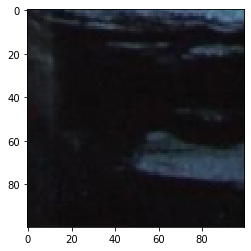

Sample: resized_алевролит_уф_2.jpg, Predicted label: Алевролит, Raw sigmoid: [[0.07001362]]


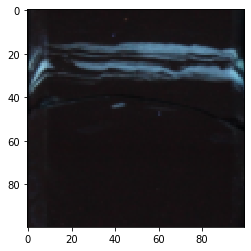

Sample: resized_алевролит_уф_1.jpg, Predicted label: Алевролит, Raw sigmoid: [[0.13210033]]


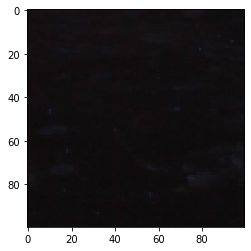

Sample: resized_песчаник_дс_5.jpg, Predicted label: Песчаник, Raw sigmoid: [[0.99930024]]


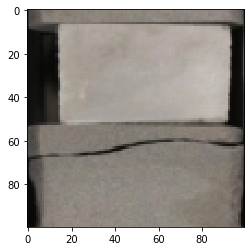

Sample: resized_алевролит_дс_3.jpg, Predicted label: Алевролит, Raw sigmoid: [[4.953968e-07]]


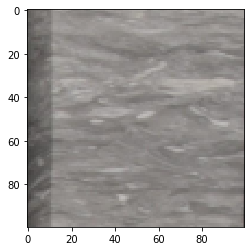

Sample: resized_песчаник_уф_4.jpg, Predicted label: Песчаник, Raw sigmoid: [[0.99990475]]


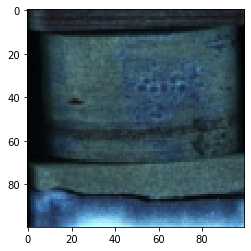

Sample: resized_песчаник_дс_4.jpg, Predicted label: Песчаник, Raw sigmoid: [[0.9999893]]


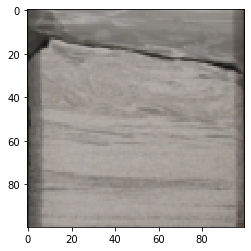

Sample: resized_песчаник_дс_2.jpg, Predicted label: Песчаник, Raw sigmoid: [[0.9999577]]


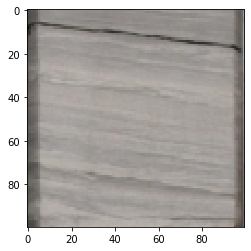

Sample: resized_алевролит_дс_2.jpg, Predicted label: Алевролит, Raw sigmoid: [[0.]]


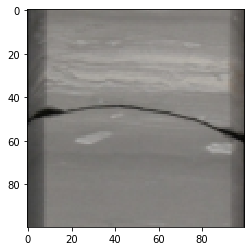

Sample: resized_алевролит_дс_1.jpg, Predicted label: Алевролит, Raw sigmoid: [[2.1316312e-07]]


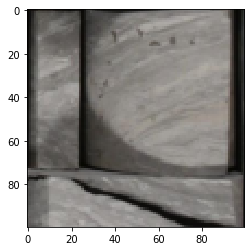

Sample: resized_песчаник_уф_5.jpg, Predicted label: Песчаник, Raw sigmoid: [[1.]]


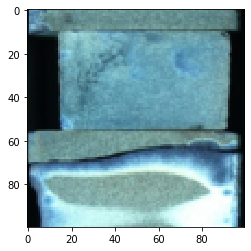

Sample: resized_песчаник_уф_3.jpg, Predicted label: Песчаник, Raw sigmoid: [[1.]]


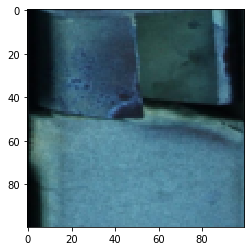

Sample: resized_песчаник_дс_1.jpg, Predicted label: Песчаник, Raw sigmoid: [[0.9986356]]


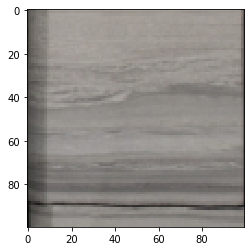

Sample: resized_песчаник_уф_1.jpg, Predicted label: Песчаник, Raw sigmoid: [[0.9462663]]


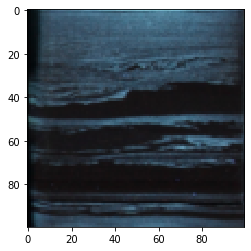

Sample: resized_песчаник_дс_3.jpg, Predicted label: Песчаник, Raw sigmoid: [[1.]]


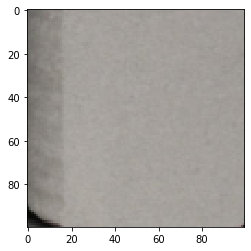

Sample: resized_песчаник_уф_2.jpg, Predicted label: Песчаник, Raw sigmoid: [[0.7955233]]


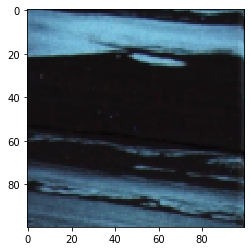

Sample: resized_алевролит_уф_3.jpg, Predicted label: Алевролит, Raw sigmoid: [[0.00344029]]


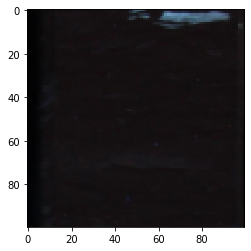

Sample: resized_песчаник_глина_дс_1.jpg, Predicted label: Алевролит, Raw sigmoid: [[0.00186088]]


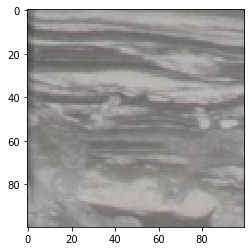

In [5]:
#Тестовый прогон на полученных выше crop'ах
for imgname in os.listdir(dst):
    img = image.load_img(os.path.join(dst, imgname), target_size=(100, 100))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    pred = model.predict(img_tensor)
    if pred >= 0.5:
        label = 'Песчаник'
    else:
        label = 'Алевролит'
    print('Sample: {0}, Predicted label: {1}, Raw sigmoid: {2}'.format(imgname, label, pred))
    plt.imshow(img)
    plt.show()